# Running HDBSCAN on different combinations of abundances

In [228]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, join, Column
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

In [230]:
galah = Table.read("/Users/chloerenard-robins/Downloads/GALAH_DR3_main_allstar_v2.fits")

In [231]:
galah

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,logg,e_logg,fe_h,e_fe_h,flag_fe_h,fe_h_atmo,vmic,vbroad,e_vbroad,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,Li_fe,e_Li_fe,nr_Li_fe,flag_Li_fe,C_fe,e_C_fe,nr_C_fe,flag_C_fe,O_fe,e_O_fe,nr_O_fe,flag_O_fe,Na_fe,e_Na_fe,nr_Na_fe,flag_Na_fe,Mg_fe,e_Mg_fe,nr_Mg_fe,flag_Mg_fe,Al_fe,e_Al_fe,nr_Al_fe,flag_Al_fe,Si_fe,e_Si_fe,nr_Si_fe,flag_Si_fe,K_fe,e_K_fe,nr_K_fe,flag_K_fe,Ca_fe,e_Ca_fe,nr_Ca_fe,flag_Ca_fe,Sc_fe,e_Sc_fe,nr_Sc_fe,flag_Sc_fe,Sc2_fe,e_Sc2_fe,nr_Sc2_fe,flag_Sc2_fe,Ti_fe,e_Ti_fe,nr_Ti_fe,flag_Ti_fe,Ti2_fe,e_Ti2_fe,nr_Ti2_fe,flag_Ti2_fe,V_fe,e_V_fe,nr_V_fe,flag_V_fe,Cr_fe,e_Cr_fe,nr_Cr_fe,flag_Cr_fe,Cr2_fe,e_Cr2_fe,nr_Cr2_fe,flag_Cr2_fe,Mn_fe,e_Mn_fe,nr_Mn_fe,flag_Mn_fe,Co_fe,e_Co_fe,nr_Co_fe,flag_Co_fe,Ni_fe,e_Ni_fe,nr_Ni_fe,flag_Ni_fe,Cu_fe,e_Cu_fe,nr_Cu_fe,flag_Cu_fe,Zn_fe,e_Zn_fe,nr_Zn_fe,flag_Zn_fe,Rb_fe,e_Rb_fe,nr_Rb_fe,flag_Rb_fe,Sr_fe,e_Sr_fe,nr_Sr_fe,flag_Sr_fe,Y_fe,e_Y_fe,nr_Y_fe,flag_Y_fe,Zr_fe,e_Zr_fe,nr_Zr_fe,flag_Zr_fe,Mo_fe,e_Mo_fe,nr_Mo_fe,flag_Mo_fe,Ru_fe,e_Ru_fe,nr_Ru_fe,flag_Ru_fe,Ba_fe,e_Ba_fe,nr_Ba_fe,flag_Ba_fe,La_fe,e_La_fe,nr_La_fe,flag_La_fe,Ce_fe,e_Ce_fe,nr_Ce_fe,flag_Ce_fe,Nd_fe,e_Nd_fe,nr_Nd_fe,flag_Nd_fe,Sm_fe,e_Sm_fe,nr_Sm_fe,flag_Sm_fe,Eu_fe,e_Eu_fe,nr_Eu_fe,flag_Eu_fe,ra_dr2,dec_dr2,parallax_dr2,parallax_error_dr2,r_est_dr2,r_lo_dr2,r_hi_dr2,r_len_dr2,rv_galah,e_rv_galah,rv_gaia_dr2,e_rv_gaia_dr2,red_flag,ebv,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flag_guess,v_jk,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual_tmass,w2mpro,w2mpro_error,ph_qual_wise,a_ks,e_a_ks,bc_ks,ruwe_dr2
,,,,,,,,,,K,K,K,mag,,log(cm.s**-2),log(cm.s**-2),,,,,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mas,mas,pc,pc,pc,pc,,,km / s,km / s,,mag,,,,,,mag,mag,mag,mag,mag,mag,mag,,mag,mag,,mag,mag,mag,
bytes16,int64,int64,int64,bytes12,int64,int64,bytes6,bytes4,int64,float32,float64,float32,float32,bytes3,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float64,float64,float64,int64,float32,float32,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int64,float64,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,bytes3,float64,float64,bytes4,float64,float64,float32,float64
03325271-6840304,131116000501002,4667368899326729856,4667368899326729856,galah_main,138,0,10k_2,lbol,0,4553.3545,137.06088556228917,4138.0,0.048,sfd,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0,-0.109347336,0.94853675,9.345594,2.5080910007092827,0.5873856,0.35136763119226394,0.07919326531297675,405.0,0,0.73446965,0.80794984,-0.18375580310821538,0.12854836388714738,1,1,--,--,--,32,1.2146472740173344,0.2138376266813869,1,1,0.14526838302612344,0.11489051187565578,1,0,-0.08849821090698207,0.19155067846881743,1

In [155]:
good = np.where((galah['flag_fe_h'] == 0) & (galah['flag_C_fe'] == 0) & (galah['flag_Mg_fe'] == 0) & (galah['flag_Al_fe'] == 0)
         & (galah['flag_Ce_fe'] == 0) & (galah['flag_Ba_fe'] == 0) & (galah['flag_Y_fe'] == 0) & (galah['fe_h'] > -.5))
# & (galah['flag_Mn_fe'] == 0)  & (galah['flag_Nd_fe'] == 0) & (galah['flag_Eu_fe'] == 0) & (galah['flag_La_fe'] == 0) 
# we select the lines from the data table where the flags for certain concentrations is 0
print(good)

(array([    66,    155,    200, ..., 588533, 588554, 588565]),)


In [157]:
galah_dynamics = Table.read("/Users/chloerenard-robins/Downloads/GALAH_DR3_VAC_dynamics_v2.fits")

In [159]:
galah_dynamics

sobject_id,use_dist_flag,use_rv_flag,X_XYZ,Y_XYZ,Z_XYZ,U_UVW,V_UVW,W_UVW,R_Rzphi,phi_Rzphi,z_Rzphi,vR_Rzphi,vT_Rzphi,vz_Rzphi,J_R,L_Z,J_Z,omega_R,omega_phi,omega_z,angle_R,angle_phi,angle_z,ecc,zmax,R_peri,R_ap,Energy,X_XYZ_5,X_XYZ_50,X_XYZ_95,Y_XYZ_5,Y_XYZ_50,Y_XYZ_95,Z_XYZ_5,Z_XYZ_50,Z_XYZ_95,U_UVW_5,U_UVW_50,U_UVW_95,V_UVW_5,V_UVW_50,V_UVW_95,W_UVW_5,W_UVW_50,W_UVW_95,R_Rzphi_5,R_Rzphi_50,R_Rzphi_95,phi_Rzphi_5,phi_Rzphi_50,phi_Rzphi_95,z_Rzphi_5,z_Rzphi_50,z_Rzphi_95,vR_Rzphi_5,vR_Rzphi_50,vR_Rzphi_95,vT_Rzphi_5,vT_Rzphi_50,vT_Rzphi_95,vz_Rzphi_5,vz_Rzphi_50,vz_Rzphi_95,J_R_5,J_R_50,J_R_95,L_Z_5,L_Z_50,L_Z_95,J_Z_5,J_Z_50,J_Z_95,omega_R_5,omega_R_50,omega_R_95,omega_phi_5,omega_phi_50,omega_phi_95,omega_z_5,omega_z_50,omega_z_95,angle_R_5,angle_R_50,angle_R_95,angle_phi_5,angle_phi_50,angle_phi_95,angle_z_5,angle_z_50,angle_z_95,ecc_5,ecc_50,ecc_95,zmax_5,zmax_50,zmax_95,R_peri_5,R_peri_50,R_peri_95,R_ap_5,R_ap_50,R_ap_95,Energy_5,Energy_50,Energy_95
,,,kpc,kpc,kpc,km / s,km / s,km / s,kpc,rad,kpc,km / s,km / s,km / s,km kpc / s,km kpc / s,km kpc / s,1 / Gyr,1 / Gyr,1 / Gyr,rad,rad,rad,,kpc,kpc,kpc,1 / (km2 s2),kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,kpc,kpc,kpc,rad,rad,rad,kpc,kpc,kpc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,rad,rad,rad,rad,rad,rad,rad,rad,rad,,,,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,1 / (km2 s2),1 / (km2 s2),1 / (km2 s2)
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
131116000501002,0,0,0.026328794151845674,-0.10251971338643251,-0.09588676007223906,-74.85739790692249,-70.0943466924733,0.46372343130329396,8.184605367231821,-0.012526233518573234,-0.07096660111613959,61.518891181852574,178.96034194505432,7.941456114842559,98.3776797597503,1464.7197752051338,0.6744433459305317,49.70320105282431,33.90872356138757,97.3638670979235,2.1249264246792827,5.990199100441617,5.1138291631999335,0.2918456489348003,0.1466968623318004,4.8449787324905165,8.83841875056594,-165908.63522577734,0.026261995741936852,0.026329700719548717,0.026389812973824655,-0.10275730984233361,-0.10252324767442506,-0.10225962575106957,-0.09610898417237226,-0.09589006660395946,-0.09564350284568698,-75.06668290154711,-74.86241434880499,-74.64590063086276,-70.31842138448714,-70.09344029719477,-69.84483937734035,0.2495488623676074,0.469550777612312,0.6728566651997708,8.184548009592216,8.184604515076696,8.184668165852514,-0.012555353438657782,-0.012526666677701023,-0.012494357532859565,-0.07118901025347696,-0.07096991039697483,-0.07072314132595564,61.311153690096305,61.5234466773216,61.723554111809115,178.7387869564471,178.96068018897975,179.2100548641424,7.726733189899178,7.94710487103244,8.151254373158892,97.7928714270848,98.3768639326627,98.90598445532916,1462.8982069598933,1464.7255503832369,1466.7676843611187,0.6491489482487538,0.6749486198395449,0.7007064180508606,49.65749761733111,49.70331948220881,49.74370943450479,33.882940335408236,33.908608715133354,33.93205993607963,97.04497606862994,97.3604822397657,97.

#### joining the spectroscopic and dynamical data

In [162]:
# joins the HDBSCAN output table and the dynamics table by identifying the cluster by its Apogee ID
spectroscopy_dynamics_joined = join (galah[good],galah_dynamics, keys='sobject_id', join_type='inner') 

In [163]:
spectroscopy_dynamics_joined

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,logg,e_logg,fe_h,e_fe_h,flag_fe_h,fe_h_atmo,vmic,vbroad,e_vbroad,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,Li_fe,e_Li_fe,nr_Li_fe,flag_Li_fe,C_fe,e_C_fe,nr_C_fe,flag_C_fe,O_fe,e_O_fe,nr_O_fe,flag_O_fe,Na_fe,e_Na_fe,nr_Na_fe,flag_Na_fe,Mg_fe,e_Mg_fe,nr_Mg_fe,flag_Mg_fe,Al_fe,e_Al_fe,nr_Al_fe,flag_Al_fe,Si_fe,e_Si_fe,nr_Si_fe,flag_Si_fe,K_fe,e_K_fe,nr_K_fe,flag_K_fe,Ca_fe,e_Ca_fe,nr_Ca_fe,flag_Ca_fe,Sc_fe,e_Sc_fe,nr_Sc_fe,flag_Sc_fe,Sc2_fe,e_Sc2_fe,nr_Sc2_fe,flag_Sc2_fe,Ti_fe,e_Ti_fe,nr_Ti_fe,flag_Ti_fe,Ti2_fe,e_Ti2_fe,nr_Ti2_fe,flag_Ti2_fe,V_fe,e_V_fe,nr_V_fe,flag_V_fe,Cr_fe,e_Cr_fe,nr_Cr_fe,flag_Cr_fe,Cr2_fe,e_Cr2_fe,nr_Cr2_fe,flag_Cr2_fe,Mn_fe,e_Mn_fe,nr_Mn_fe,flag_Mn_fe,Co_fe,e_Co_fe,nr_Co_fe,flag_Co_fe,Ni_fe,e_Ni_fe,nr_Ni_fe,flag_Ni_fe,Cu_fe,e_Cu_fe,nr_Cu_fe,flag_Cu_fe,Zn_fe,e_Zn_fe,nr_Zn_fe,flag_Zn_fe,Rb_fe,e_Rb_fe,nr_Rb_fe,flag_Rb_fe,Sr_fe,e_Sr_fe,nr_Sr_fe,flag_Sr_fe,Y_fe,e_Y_fe,nr_Y_fe,flag_Y_fe,Zr_fe,e_Zr_fe,nr_Zr_fe,flag_Zr_fe,Mo_fe,e_Mo_fe,nr_Mo_fe,flag_Mo_fe,Ru_fe,e_Ru_fe,nr_Ru_fe,flag_Ru_fe,Ba_fe,e_Ba_fe,nr_Ba_fe,flag_Ba_fe,La_fe,e_La_fe,nr_La_fe,flag_La_fe,Ce_fe,e_Ce_fe,nr_Ce_fe,flag_Ce_fe,Nd_fe,e_Nd_fe,nr_Nd_fe,flag_Nd_fe,Sm_fe,e_Sm_fe,nr_Sm_fe,flag_Sm_fe,Eu_fe,e_Eu_fe,nr_Eu_fe,flag_Eu_fe,ra_dr2,dec_dr2,parallax_dr2,parallax_error_dr2,r_est_dr2,r_lo_dr2,r_hi_dr2,r_len_dr2,rv_galah,e_rv_galah,rv_gaia_dr2,e_rv_gaia_dr2,red_flag,ebv,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flag_guess,v_jk,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual_tmass,w2mpro,w2mpro_error,ph_qual_wise,a_ks,e_a_ks,bc_ks,ruwe_dr2,use_dist_flag,use_rv_flag,X_XYZ,Y_XYZ,Z_XYZ,U_UVW,V_UVW,W_UVW,R_Rzphi,phi_Rzphi,z_Rzphi,vR_Rzphi,vT_Rzphi,vz_Rzphi,J_R,L_Z,J_Z,omega_R,omega_phi,omega_z,angle_R,angle_phi,angle_z,ecc,zmax,R_peri,R_ap,Energy,X_XYZ_5,X_XYZ_50,X_XYZ_95,Y_XYZ_5,Y_XYZ_50,Y_XYZ_95,Z_XYZ_5,Z_XYZ_50,Z_XYZ_95,U_UVW_5,U_UVW_50,U_UVW_95,V_UVW_5,V_UVW_50,V_UVW_95,W_UVW_5,W_UVW_50,W_UVW_95,R_Rzphi_5,R_Rzphi_50,R_Rzphi_95,phi_Rzphi_5,phi_Rzphi_50,phi_Rzphi_95,z_Rzphi_5,z_Rzphi_50,z_Rzphi_95,vR_Rzphi_5,vR_Rzphi_50,vR_Rzphi_95,vT_Rzphi_5,vT_Rzphi_50,vT_Rzphi_95,vz_Rzphi_5,vz_Rzphi_50,vz_Rzphi_95,J_R_5,J_R_50,J_R_95,L_Z_5,L_Z_50,L_Z_95,J_Z_5,J_Z_50,J_Z_95,omega_R_5,omega_R_50,omega_R_95,omega_phi_5,omega_phi_50,omega_phi_95,omega_z_5,omega_z_50,omega_z_95,angle_R_5,angle_R_50,angle_R_95,angle_phi_5,angle_phi_50,angle_phi_95,angle_z_5,angle_z_50,angle_z_95,ecc_5,ecc_50,ecc_95,zmax_5,zmax_50,zmax_95,R_peri_5,R_peri_50,R_peri_95,R_ap_5,R_ap_50,R_ap_95,Energy_5,Energy_50,Energy_95
,,,,,,,,,,K,K,K,mag,,log(cm.s**-2),log(cm.s**-2),,,,,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mas,mas,pc,pc,pc,pc,,,km / s,km / s,,mag,,,,,,mag,mag,mag,mag,mag,mag,mag,,mag,mag,,mag,mag,mag,,,,kpc,kpc,kpc,km / s,km / s,km / s,kpc,rad,kpc,km / s,km / s,km / s,km kpc / s,km kpc / s,km kpc / s,1 / Gyr,1 / Gyr,1 / Gyr,rad,rad,rad,,kpc,kpc,kpc,1 / (km2 s2),kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,kpc,kpc,kpc,rad,rad,rad,kpc,kpc,kpc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,km kpc / s,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,1 / Gyr,rad,rad,rad,rad,rad,rad,rad,rad,rad,,,,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,kpc,1 / (km2 s2),1 / (km2 s2),1 / (km2 s2)
bytes16,int64,int64,int64,bytes12,int64,int64,bytes6,bytes4,int64,float32,float64,float32,float32,bytes3,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float64,float64,float64,int64,float32,float32,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,floa

#### running HDBSCAN and dynamical spread analysis on different combinations of abundances

In [296]:
galah_table_chunk_going_into_hdbscan = spectroscopy_dynamics_joined['fe_h','Mg_fe', 'C_fe', 'Al_fe','Ce_fe', 'Ba_fe', 'Y_fe'] #'La_fe', 'Nd_fe','Eu_fe']
abund_cols = ['fe_h','Mg_fe', 'C_fe', 'Al_fe', 'Ce_fe', 'Ba_fe', 'Y_fe'] #'La_fe', 'Nd_fe','Eu_fe'] # creates a list of the columns of abundances that will be used
label_col  = 'HDBSCAN_Cluster' # creates a column for the cluster group 
df = galah_table_chunk_going_into_hdbscan.to_pandas().astype('float64')  # transforms table of columns that will run through HDBSCAN into a DataFrame

In [298]:
# creates a list of all of the different possible combinations of the seven abundances used
combos = (
    list(itertools.combinations(abund_cols, 2)) +  # all 2‑D combinations
    list(itertools.combinations(abund_cols, 3)) +  # all 3‑D combinations
    list(itertools.combinations(abund_cols, 4)) +  # all 4‑D combinations
    list(itertools.combinations(abund_cols, 5)) +  # all 5‑D combinations
    list(itertools.combinations(abund_cols, 6)) +  # all 6‑D combinations
    list(itertools.combinations(abund_cols, 7)) #+  # all 7‑D combinations
    #list(itertools.combinations(abund_cols, 8))    # all 8‑D combinations
)

In [300]:
mcs = 3 #this is what the other paper said
maxcs = 1222 # arbitrary
cse = 0.02

In [302]:
clusterers = {}  # creates a dictionary to hold each fitted HDBSCAN model 
cluster_labels_dict = {}  # creates a dictrionary to hold all new columns
spread_cols = ['Energy', 'ecc', 'zmax', 'J_R', 'J_Z', 'L_Z'] # creates a list of the columns that will be used to calculate spread
spread_results = {} # creates a dictionary to hold the calculated results of the spreads

df_abund = galah_table_chunk_going_into_hdbscan.to_pandas().astype('float64') # abundance DataFrame (used for clustering)

# dynamical DataFrame (used for spread analysis)
df_dyn = pd.DataFrame(
    {col: np.asarray(spectroscopy_dynamics_joined[col], dtype='float64') # turns each column into a numpy array and assigns each array to its corresponding key
     for col in spread_cols}, # loops through each column in spread_cols  
    index=np.arange(len(spectroscopy_dynamics_joined)) # ensures that the DataFrame has the same length as the astropy table
)
df_dyn['sobject_id'] = spectroscopy_dynamics_joined['sobject_id'] # adds a column to the DataaFrame for apogee id


for combo in combos: # loops over each tuple of abundances
    tag = '|'.join(combo) # joins the different abundances into a name with abundances seperated by |
    features = df_abund[list(combo)].to_numpy() # pulls only the relevent columns from df and turns it into a numpy array
    hdb = HDBSCAN(min_cluster_size=mcs, cluster_selection_epsilon = cse, max_cluster_size= maxcs) # configures a new HDBSCAN instance
    hdb.fit(features) # runs HDBSCAN
    labels = hdb.labels_.astype(int) 
    clusterers[tag] = hdb # saves the fitted model into the clusterers dictionary
    cluster_labels_dict[f'cluster_{tag}'] = labels # stores labels in the column dictionary
    dyn_tmp = df_dyn.copy() # compute average cluster size
    dyn_tmp['HDBSCAN_Cluster'] = labels # Merge cluster labels with dynamical data
    dyn_good = dyn_tmp[~dyn_tmp['HDBSCAN_Cluster'].isin([-1, -3])] # remove noise and outliers
    spread = dyn_good.groupby('HDBSCAN_Cluster')[spread_cols].std() # compute spread within each cluster
    spread_results[tag] = spread.mean()  # average spread per dynamical variable
cluster_df = pd.DataFrame(cluster_labels_dict, index=df.index) # creates a dataframe with every key in cluster_labels_dict as a column and the same index as df
df = pd.concat([df, cluster_df], axis=1) # attaches all new cluster columns to the main DataFrame
spread_summary = pd.DataFrame(spread_results).T  # rows = tags, cols = variables
spread_summary.reset_index(inplace=True)
spread_summary.rename(columns={'index': 'combo_tag'}, inplace=True)
spread_table = Table.from_pandas(spread_summary)

In [304]:
cluster_counts = {} # creates an empty dictionary that will map combo tag to the number of clusters

for tag in clusterers.keys(): # iterates over every abundance combo
    col = f'cluster_{tag}' # builds the dataframe column name
    unique_labels = pd.unique(df[col].values.ravel()) # grabs all the distinct label values that represent seperate clusters in that column 
    n_clusters = len(unique_labels[unique_labels >= 0])  # ignores all the values that are negative (-1 is noise)
    cluster_counts[tag] = n_clusters # saves the count of clusters to a dictionary

print("Clusters found per combo:")
for tag, n in cluster_counts.items(): # iterates over the dictionary
    print(f"{tag:<30}  {n:3d}") # prints the tags is a readable format (left aligns the tag in a 30 character field and shows the number of clusters as a three digit integer)

Clusters found per combo:
fe_h|Mg_fe                       60
fe_h|C_fe                        73
fe_h|Al_fe                       46
fe_h|Ce_fe                       94
fe_h|Ba_fe                      158
fe_h|Y_fe                       151
Mg_fe|C_fe                       80
Mg_fe|Al_fe                      59
Mg_fe|Ce_fe                      84
Mg_fe|Ba_fe                     112
Mg_fe|Y_fe                      115
C_fe|Al_fe                       84
C_fe|Ce_fe                      126
C_fe|Ba_fe                      170
C_fe|Y_fe                       164
Al_fe|Ce_fe                      86
Al_fe|Ba_fe                     113
Al_fe|Y_fe                      128
Ce_fe|Ba_fe                     194
Ce_fe|Y_fe                      178
Ba_fe|Y_fe                      192
fe_h|Mg_fe|C_fe                 513
fe_h|Mg_fe|Al_fe                383
fe_h|Mg_fe|Ce_fe                567
fe_h|Mg_fe|Ba_fe                567
fe_h|Mg_fe|Y_fe                 607
fe_h|C_fe|Al_fe                 522
fe

In [306]:
tags    = list(cluster_counts.keys())          # abundance‑combo strings
n_clust = [cluster_counts[t] for t in tags]    # corresponding counts

results_tbl = Table(
    [tags, n_clust],
    names=('combo_tag', 'n_clusters')
)

In [308]:
results_tbl.pprint(max_lines=-1) # makes all lines visible
results_tbl.write('results_table_GALAH.ecsv', format='ascii.ecsv', overwrite=True)

              combo_tag                n_clusters
-------------------------------------- ----------
                            fe_h|Mg_fe         60
                             fe_h|C_fe         73
                            fe_h|Al_fe         46
                            fe_h|Ce_fe         94
                            fe_h|Ba_fe        158
                             fe_h|Y_fe        151
                            Mg_fe|C_fe         80
                           Mg_fe|Al_fe         59
                           Mg_fe|Ce_fe         84
                           Mg_fe|Ba_fe        112
                            Mg_fe|Y_fe        115
                            C_fe|Al_fe         84
                            C_fe|Ce_fe        126
                            C_fe|Ba_fe        170
                             C_fe|Y_fe        164
                           Al_fe|Ce_fe         86
                           Al_fe|Ba_fe        113
                            Al_fe|Y_fe        128


In [310]:
average_cluster_sizes = {}  # combo tag → average size
outlier_counts = {}

for tag, hdb in clusterers.items():
    labels = hdb.labels_  # get cluster labels for this combo
    n_outlier = sum(labels == -1) # counts number of outliers 
    outlier_counts[tag] = n_outlier # stores the outlier count for a particular combination of abundances in a dictionary
    labels_cleaned = labels[labels != -1] # filters out noise 
    cluster_count = pd.Series(labels_cleaned).value_counts() # counts the number of stars in each cluster
    avg_size = cluster_count.mean() # computes the average number of stars in each cluster
    average_cluster_sizes[tag] = avg_size # stores the average cluster size for a particular combination of abundances in a dictionary

# convert to a table
combo_tags = list(average_cluster_sizes.keys())
avg_sizes = list(average_cluster_sizes.values())
outlier_number = list(outlier_counts.values())

# creates pandas DataFrame
avg_size_outlier_df = pd.DataFrame({
    'Abundance_Combination': combo_tags,
    'Average_Cluster_Size': avg_sizes,
    'Number_Outliers': outlier_number
})
# converts to Astropy Table
avg_size_outlier_table = Table.from_pandas(avg_size_outlier_df)

In [312]:
avg_size_outlier_table.pprint(max_lines=-1) # makes all lines visible

        Abundance_Combination          Average_Cluster_Size Number_Outliers
-------------------------------------- -------------------- ---------------
                            fe_h|Mg_fe                633.0             204
                             fe_h|C_fe    519.5479452054794             257
                            fe_h|Al_fe    825.3260869565217             219
                            fe_h|Ce_fe   403.21276595744683             282
                            fe_h|Ba_fe   239.26582278481013             380
                             fe_h|Y_fe   250.25165562913907             396
                            Mg_fe|C_fe             473.4875             305
                           Mg_fe|Al_fe    643.1864406779661             236
                           Mg_fe|Ce_fe    450.8809523809524             310
                           Mg_fe|Ba_fe   337.70535714285717             361
                            Mg_fe|Y_fe   328.83478260869566             368
            

In [314]:
avg_size_outlier_table
avg_size_outlier_table.write('avg_size_outlier_table_GALAH.ecsv', format='ascii.ecsv', overwrite=True)

In [316]:
spread_table # prints the spread data as an astropy table
spread_table.write('spread_table_GALAH.ecsv', format='ascii.ecsv', overwrite=True)

#### plot of results

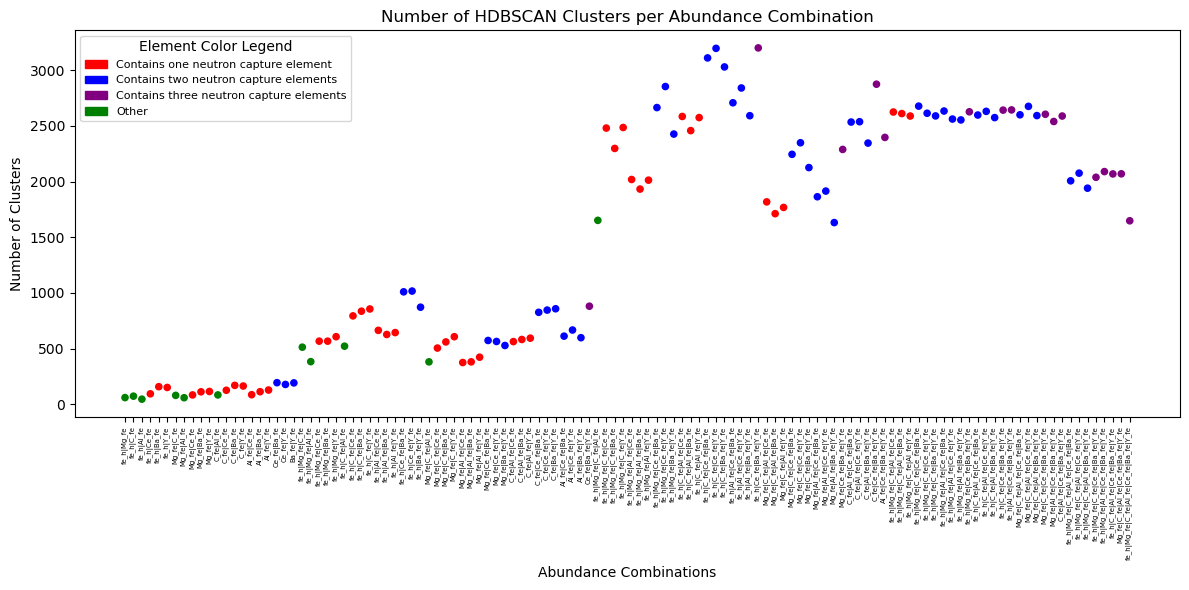

In [339]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x_labels = list(cluster_counts.keys()) # assigns the names of combinations of abundances as the x-axis
y_values = list(cluster_counts.values()) # assigns the number of clusters as the y-axis

# makes the points corresponding to abundance combos with specific neutron capture elements show up in specific colors and all others show up in green
point_colors = []
for tag in x_labels:
    count = sum(elem in tag for elem in ['Ce_fe', 'Ba_fe', 'Y_fe', 'La_fe'])
    
    if count == 1:
        point_colors.append('red')      # only one of the three
    elif count == 2:
        point_colors.append('blue')     # two of the three
    elif count == 3:
        point_colors.append('purple')   # all three
    elif count == 4:
        point_colors.append('pink')   # all four
    else:
        point_colors.append('green')    # none of them

# creates the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_labels, y_values, color=point_colors, s=20)

# adds a legend for the colors
legend_handles = [
    mpatches.Patch(color='red', label='Contains one neutron capture element'),
    mpatches.Patch(color='blue', label='Contains two neutron capture elements'),
    mpatches.Patch(color='purple', label='Contains three neutron capture elements'),
    #mpatches.Patch(color='pink', label='Contains three neutron capture elements'),
    mpatches.Patch(color='green', label='Other'),
]
plt.legend(handles=legend_handles, title='Element Color Legend', fontsize=8)

plt.xticks(rotation=90, fontsize=5) # improves readability of long x-axis labels by rotating 90 degrees and shrinking font size
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.tight_layout()

#plt.grid()
plt.savefig("8D_GALAH.png", bbox_inches='tight', dpi=200)
plt.show()


<Figure size 1200x600 with 0 Axes>

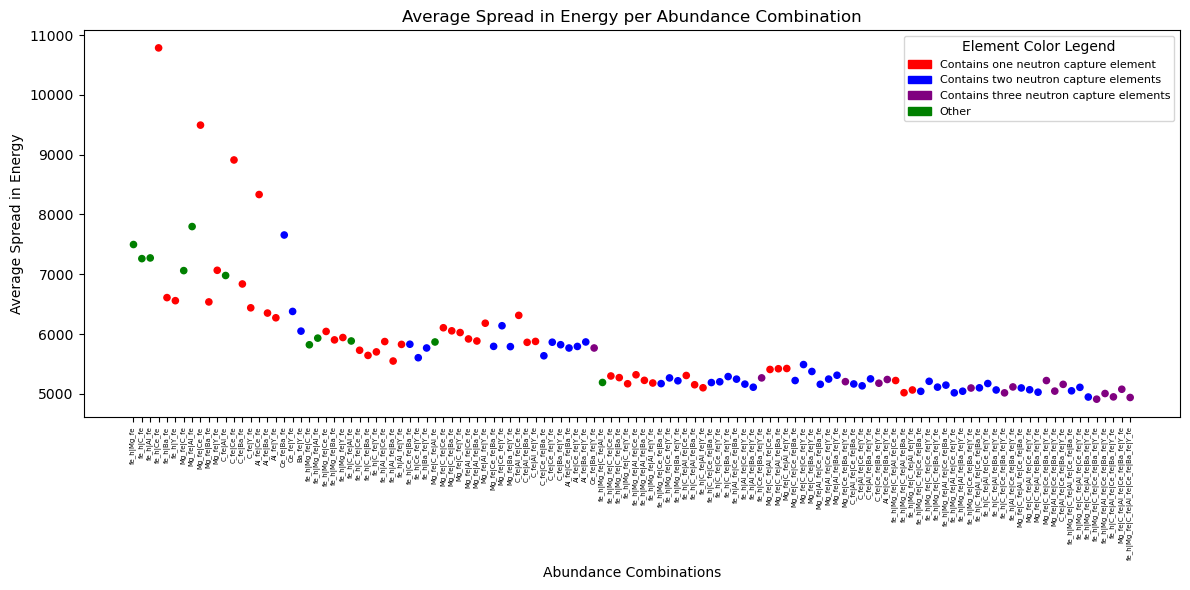

<Figure size 1200x600 with 0 Axes>

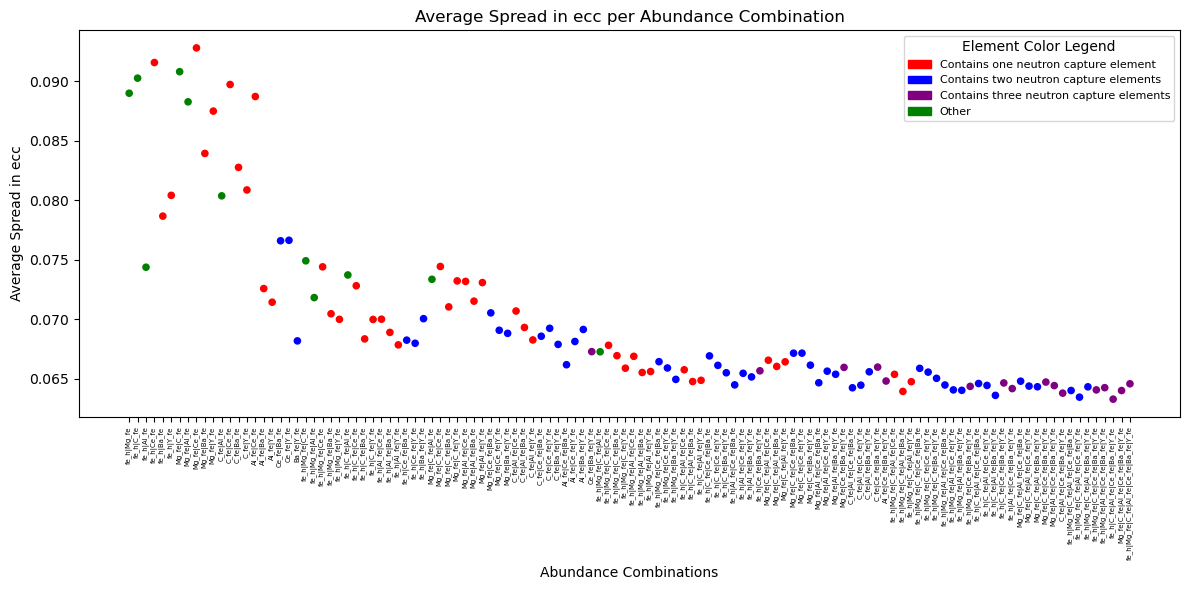

<Figure size 1200x600 with 0 Axes>

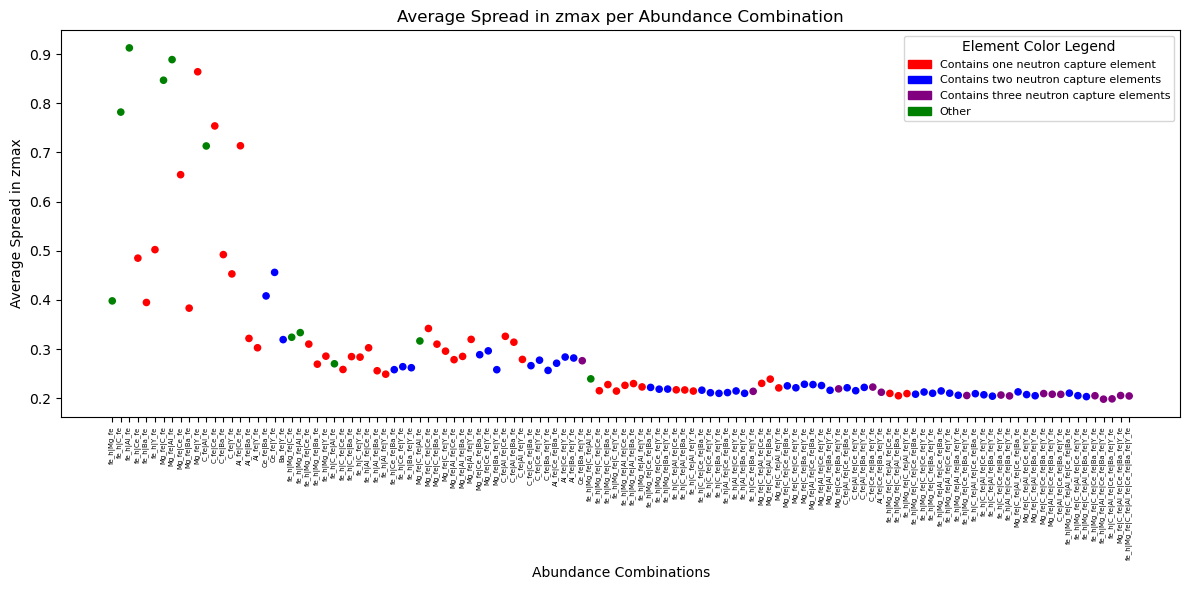

<Figure size 1200x600 with 0 Axes>

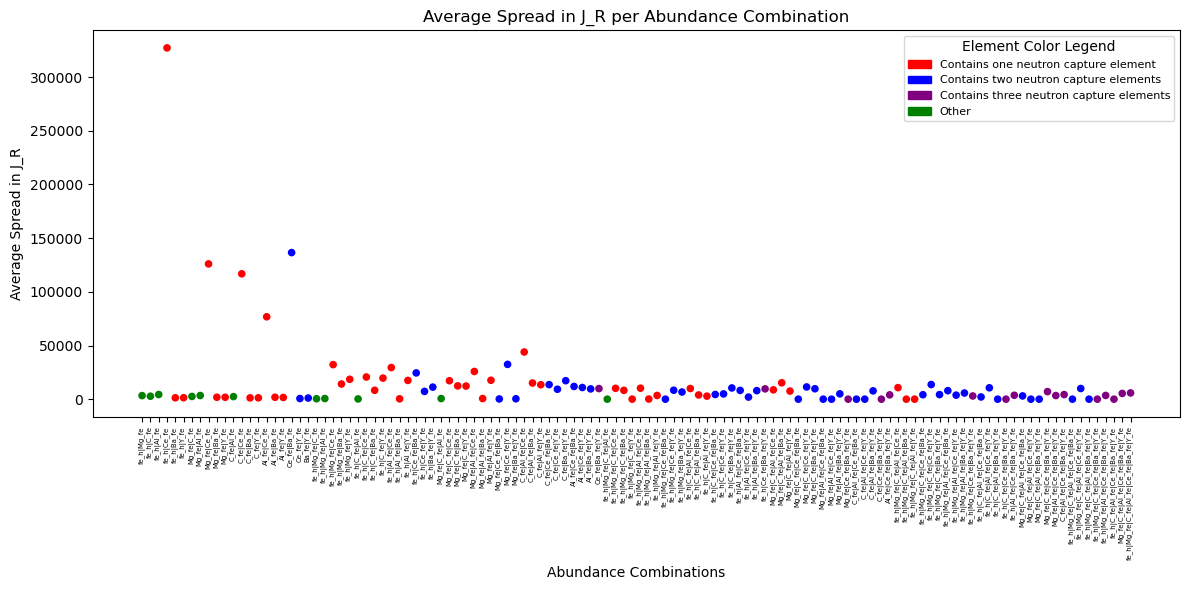

<Figure size 1200x600 with 0 Axes>

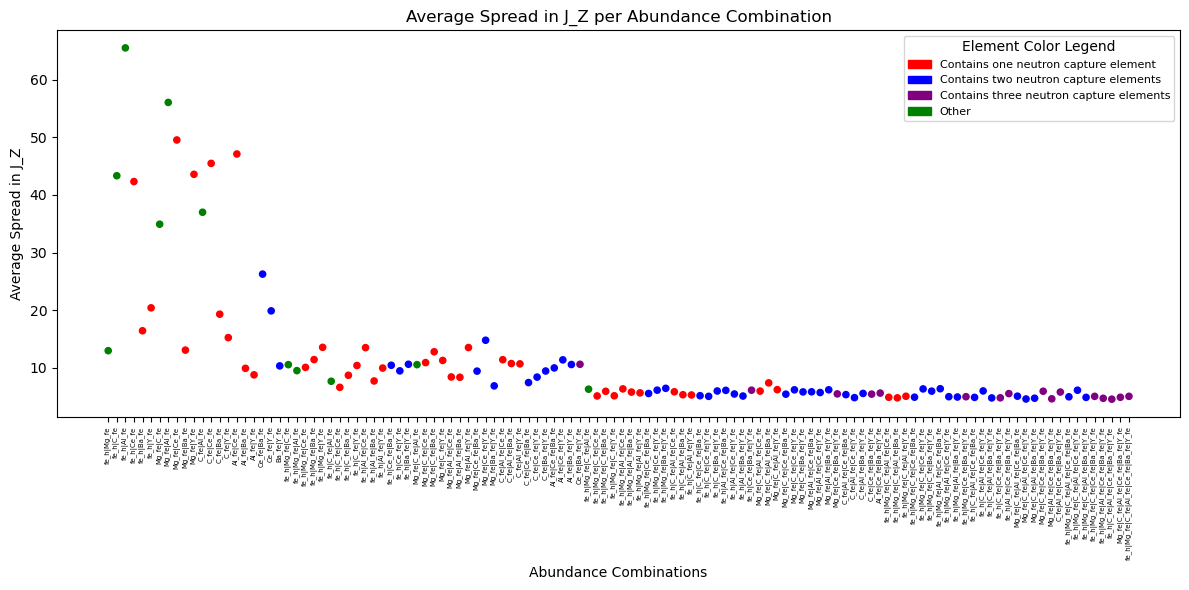

<Figure size 1200x600 with 0 Axes>

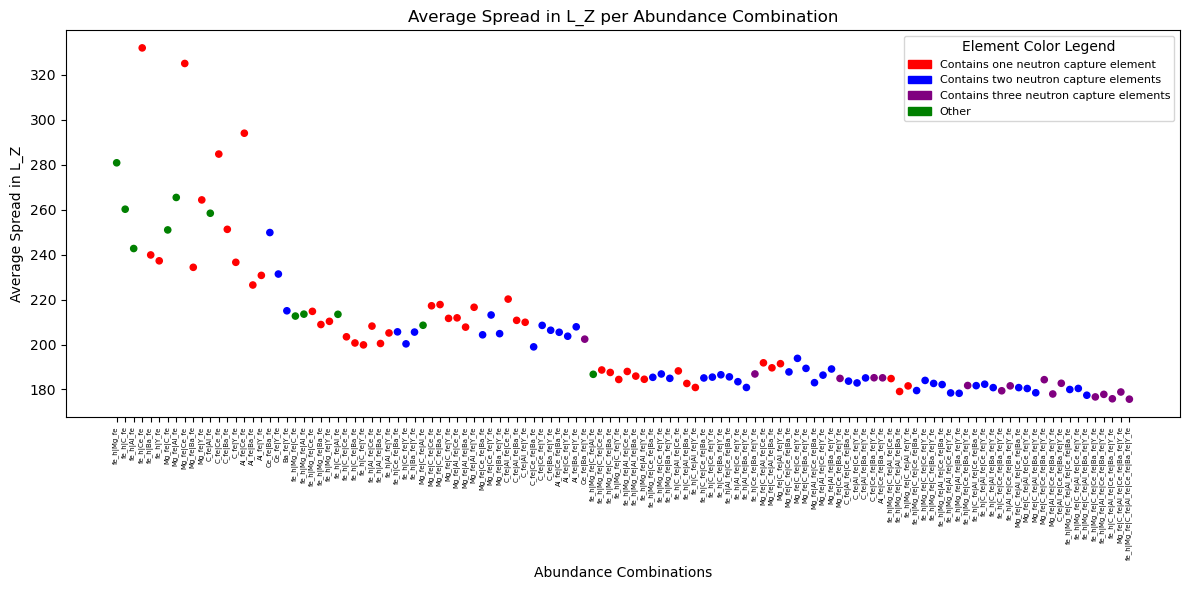

In [337]:
for col in spread_summary.columns:
    if col == 'combo_tag':  # avoid printing a plot with combo tag vs. combo tag
        continue  # skip this column
    plt.figure(figsize=(12, 6))
    x_labels = spread_summary['combo_tag'].tolist() # adds each combination of abundances to a list that becomes the x values
    y_values = spread_summary[col].values # extracts the values from the specified column and assigns them as the y value

    # makes the points corresponding to abundance combos with specific neutron capture elements show up in specific colors and all others show up in green
    point_colors = []
    for tag in x_labels:
        count = sum(elem in tag for elem in ['Ce_fe', 'Ba_fe', 'Y_fe'])
    
        if count == 1:
            point_colors.append('red')      # only one of the three
        elif count == 2:
            point_colors.append('blue')     # two of the three
        elif count == 3:
            point_colors.append('purple')   # all three
        elif count == 4:
            point_colors.append('pink')   # all four
        else:
            point_colors.append('green')    # none of them
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_labels, y_values, color=point_colors, s=20)

    # adds a legend for the colors
    legend_handles = [
        mpatches.Patch(color='red', label='Contains one neutron capture element'),
        mpatches.Patch(color='blue', label='Contains two neutron capture elements'),
        mpatches.Patch(color='purple', label='Contains three neutron capture elements'),
        #mpatches.Patch(color='pink', label='Contains three neutron capture elements'),
        mpatches.Patch(color='green', label='Other'),
    ]
    plt.legend(handles=legend_handles, title='Element Color Legend', fontsize=8)
    plt.xticks(rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}") # flexible name that changes for each property
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.tight_layout()
    #plt.grid()
    plt.savefig("8D_GALAH_dynamics.png", bbox_inches='tight', dpi=200)
    plt.show()

In [321]:
print(repr(spread_summary.columns.tolist()))

['combo_tag', 'Energy', 'ecc', 'zmax', 'J_R', 'J_Z', 'L_Z']


#### finding the fit for the results

Average percent difference between fits: 176.13%


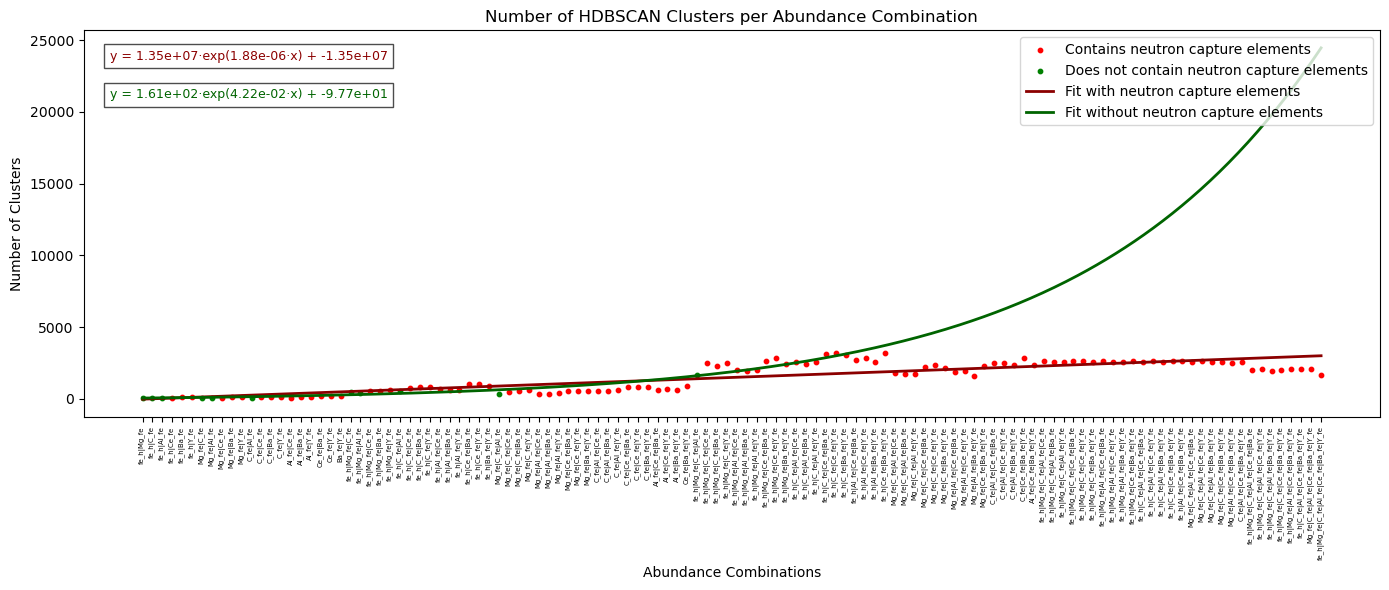

In [344]:
from scipy.optimize import curve_fit
# Define exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Prepare data
x_labels = list(cluster_counts.keys())
y_values = list(cluster_counts.values())
x_numeric = np.arange(len(x_labels))  # numeric x for fitting
y_values = np.array(y_values)

# Split by neutron capture elements
red_x, red_y = [], []
green_x, green_y = [], []

for i, tag in enumerate(x_labels):
    if 'Ce_fe' in tag or 'Y_fe' in tag or 'Ba_fe' in tag:
        red_x.append(x_numeric[i])
        red_y.append(y_values[i])
    else:
        green_x.append(x_numeric[i])
        green_y.append(y_values[i])

# Fit exponential model
x_fit = np.linspace(0, len(x_labels)-1, 500)

if len(red_x) >= 3:
    popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000)
    red_fit_y = exp_func(x_fit, *popt_red)
    red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}"

if len(green_x) >= 3:
    popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
    green_fit_y = exp_func(x_fit, *popt_green)
    green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

# ---- Percent difference calculation ----
if popt_red is not None and popt_green is not None:
    # Calculate percent difference across the same x_fit range
    y_red = exp_func(x_fit, *popt_red)
    y_green = exp_func(x_fit, *popt_green)

percent_diff = (y_green - y_red) / y_red * 100  # relative to red
avg_percent_diff = np.mean(np.abs(percent_diff))
print(f"Average percent difference between fits: {avg_percent_diff:.2f}%")

# Create the scatter plot
plt.figure(figsize=(14, 6))
point_colors = ['red' if '__Ba_Fe_' in tag or '__Y_Fe_' in tag else 'green' for tag in x_labels]
plt.scatter(red_x, red_y, color='red', s=10, label='Contains neutron capture elements')
plt.scatter(green_x, green_y, color='green', s=10, label='Does not contain neutron capture elements')

# Plot fits
plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with neutron capture elements')
plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without neutron capture elements')
plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
             color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Format x-axis with original labels
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
plt.xlabel("Abundance Combinations")
plt.ylabel("Number of Clusters")
plt.title("Number of HDBSCAN Clusters per Abundance Combination")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Average percent difference between fits: 21.72%


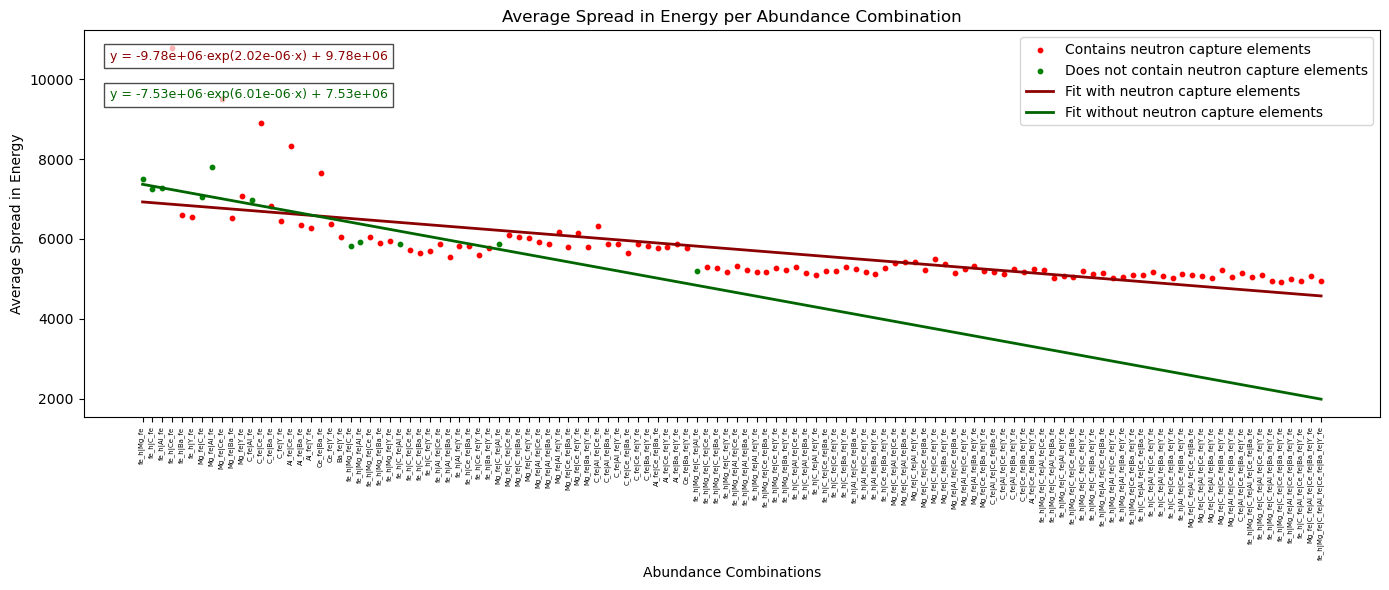

Average percent difference between fits: 3.05%


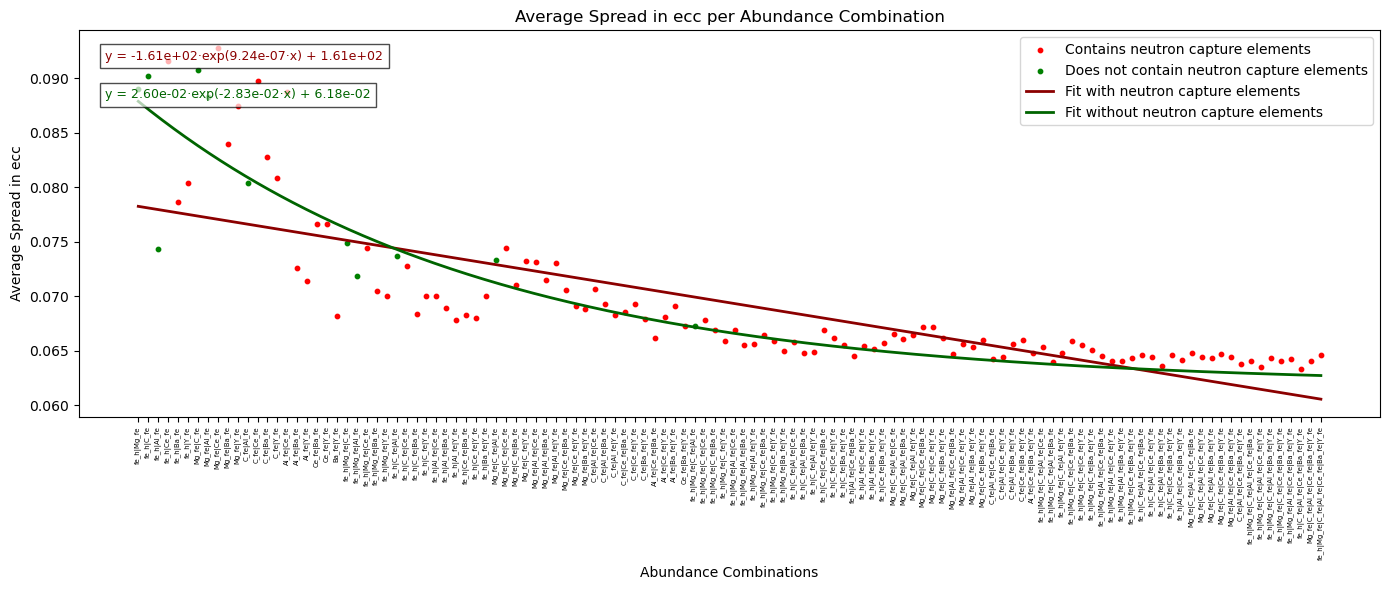

Average percent difference between fits: 53.62%


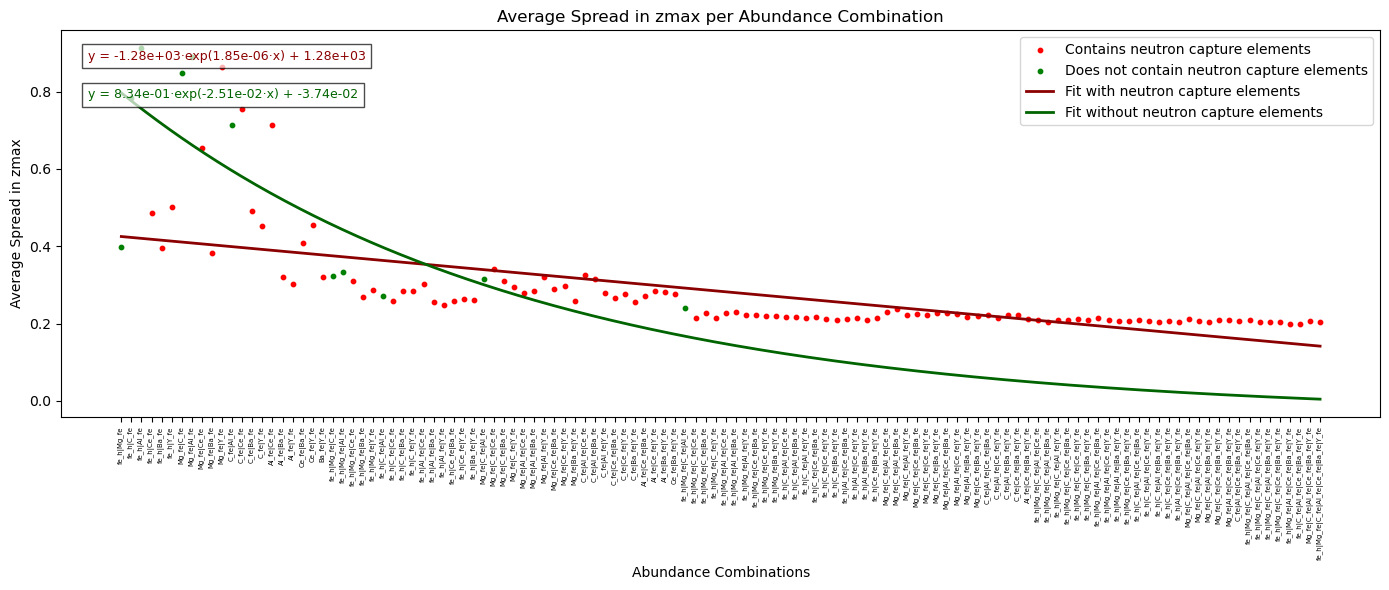

Average percent difference between fits: 103.52%


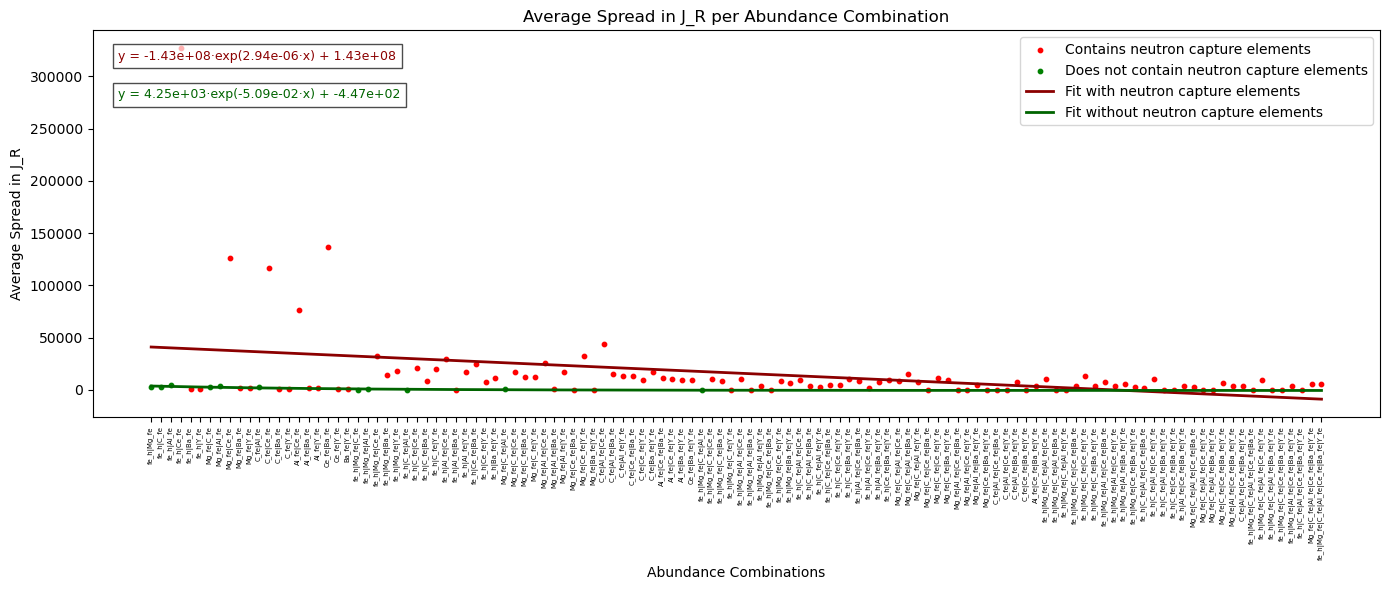

Average percent difference between fits: 108.35%


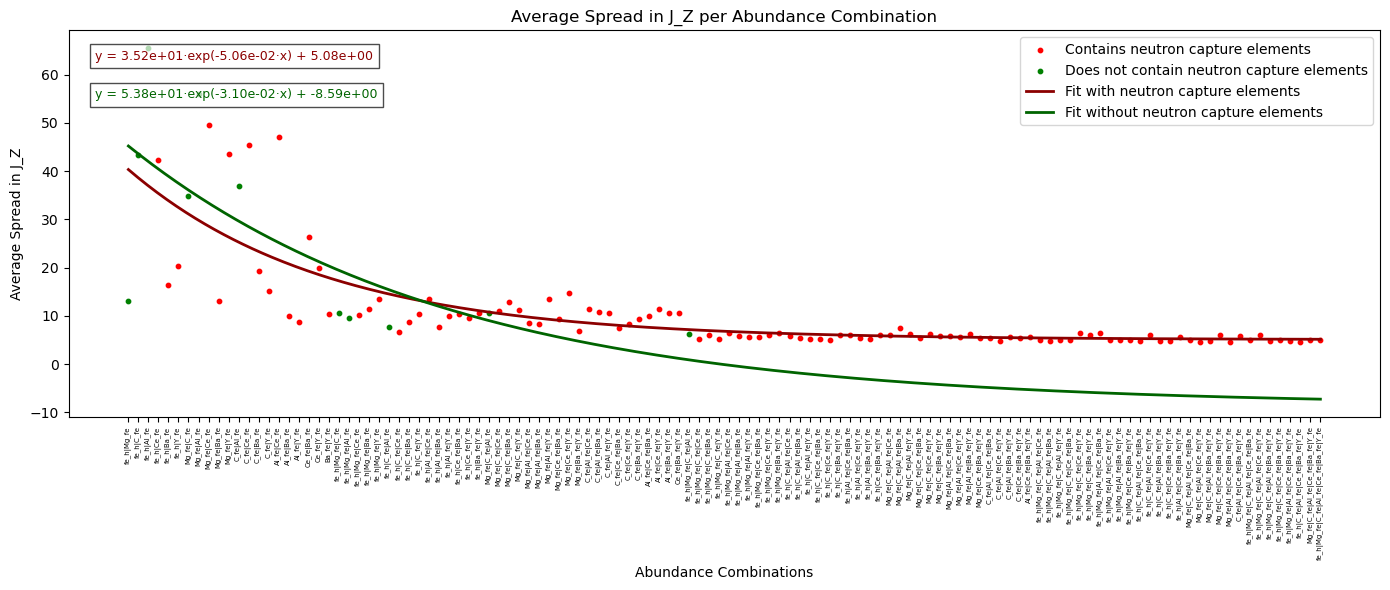

Average percent difference between fits: 5.05%


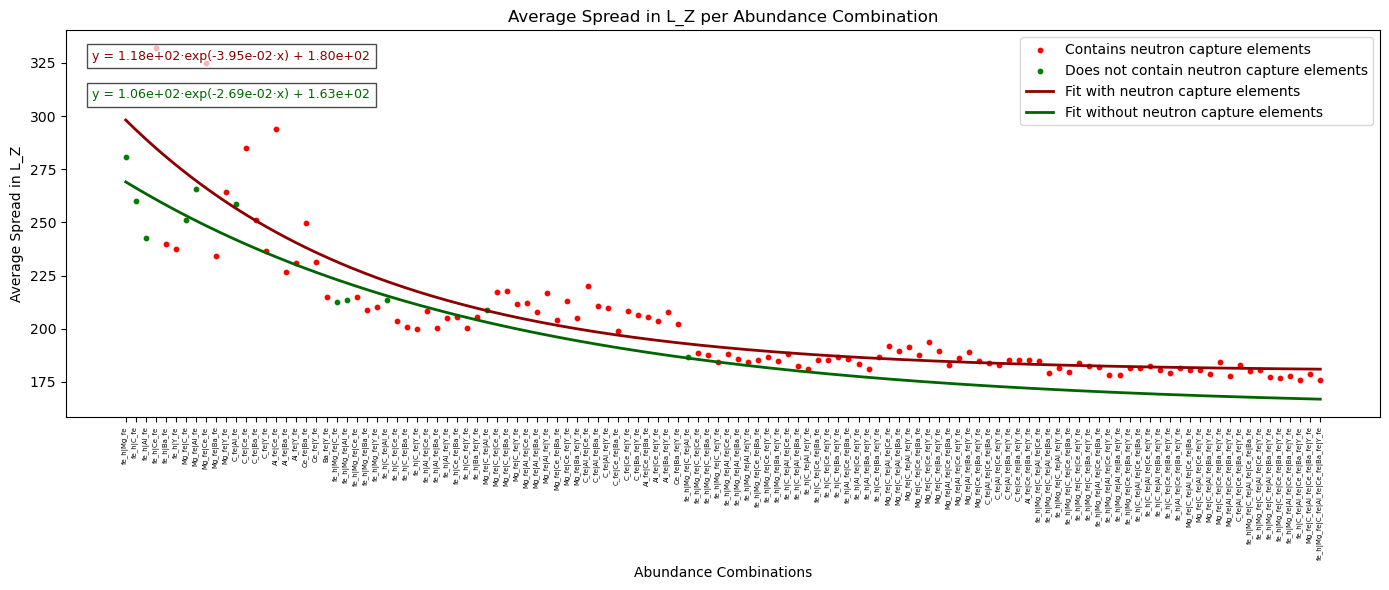

In [346]:
for col in spread_summary.columns:
    if col == 'combo_tag':
        continue  # skip combo_tag column
    # Prepare data
    x_labels = spread_summary['combo_tag'].tolist() # adds ea
    y_values = spread_summary[col].values
    x_numeric = np.arange(len(x_labels))  # numeric x for fitting
    y_values = np.array(y_values)
    
    # Split by CE_FE
    red_x, red_y = [], []
    green_x, green_y = [], []
    
    for i, tag in enumerate(x_labels):
        if 'Ce_fe' in tag or 'Y_fe' in tag or 'Ba_fe' in tag:
            red_x.append(x_numeric[i])
            red_y.append(y_values[i])
        else:
            green_x.append(x_numeric[i])
            green_y.append(y_values[i])
    
    # Fit exponential model
    x_fit = np.linspace(0, len(x_labels)-1, 500)
    
    if len(red_x) >= 3:
        popt_red, _ = curve_fit(exp_func, red_x, red_y, p0=(1, 1e-6, 1), maxfev=10000)
        red_fit_y = exp_func(x_fit, *popt_red)
        red_eq = f"y = {popt_red[0]:.2e}·exp({popt_red[1]:.2e}·x) + {popt_red[2]:.2e}"
    
    if len(green_x) >= 3:
        popt_green, _ = curve_fit(exp_func, green_x, green_y, p0=(1, 1e-6, 1), maxfev=10000)
        green_fit_y = exp_func(x_fit, *popt_green)
        green_eq = f"y = {popt_green[0]:.2e}·exp({popt_green[1]:.2e}·x) + {popt_green[2]:.2e}"

        # ---- Percent difference calculation ----
    if popt_red is not None and popt_green is not None:
        # Calculate percent difference across the same x_fit range
        y_red = exp_func(x_fit, *popt_red)
        y_green = exp_func(x_fit, *popt_green)

    percent_diff = (y_green - y_red) / y_red * 100  # relative to red
    avg_percent_diff = np.mean(np.abs(percent_diff))
    print(f"Average percent difference between fits: {avg_percent_diff:.2f}%")
    
    # Create the scatter plot
    plt.figure(figsize=(14, 6))
    point_colors = ['red' if '__Ba_Fe_' in tag or '__Y_Fe_' in tag else 'green' for tag in x_labels]
    plt.scatter(red_x, red_y, color='red', s=10, label='Contains neutron capture elements')
    plt.scatter(green_x, green_y, color='green', s=10, label='Does not contain neutron capture elements')
    
    # Plot fits
    plt.plot(x_fit, red_fit_y, color='darkred', linewidth=2, label='Fit with neutron capture elements')
    plt.text(0.02, 0.95, red_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkred', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    plt.plot(x_fit, green_fit_y, color='darkgreen', linewidth=2, label='Fit without neutron capture elements')
    plt.text(0.02, 0.85, green_eq, transform=plt.gca().transAxes, fontsize=9,
                 color='darkgreen', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Format x-axis with original labels
    plt.xticks(ticks=x_numeric, labels=x_labels, rotation=90, fontsize=5)
    plt.xlabel("Abundance Combinations")
    plt.ylabel(f"Average Spread in {col}")
    plt.title(f"Average Spread in {col} per Abundance Combination")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()